C:\Users\lyz\AppData\Local\Temp\ipykernel_2648\1273958942.py:11: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(cnt_file, preload=True)
D:\TVB_Distribution\tvb_data\Lib\site-packages\mne\channels\layout.py:893: RuntimeWarning: invalid value encountered in divide
  xs /= sqs  # Shape to a sphere and normalize
D:\TVB_Distribution\tvb_data\Lib\site-packages\mne\channels\layout.py:894: RuntimeWarning: invalid value encountered in divide
  ys /= sqs


Reading 0 ... 264396  =      0.000 ...   528.792 secs...
<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2019-04-30 08:15:52 UTC
 nchan: 32
 projs: []
 sfreq: 500.0 Hz
 subject_info: 5 items (dict)
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


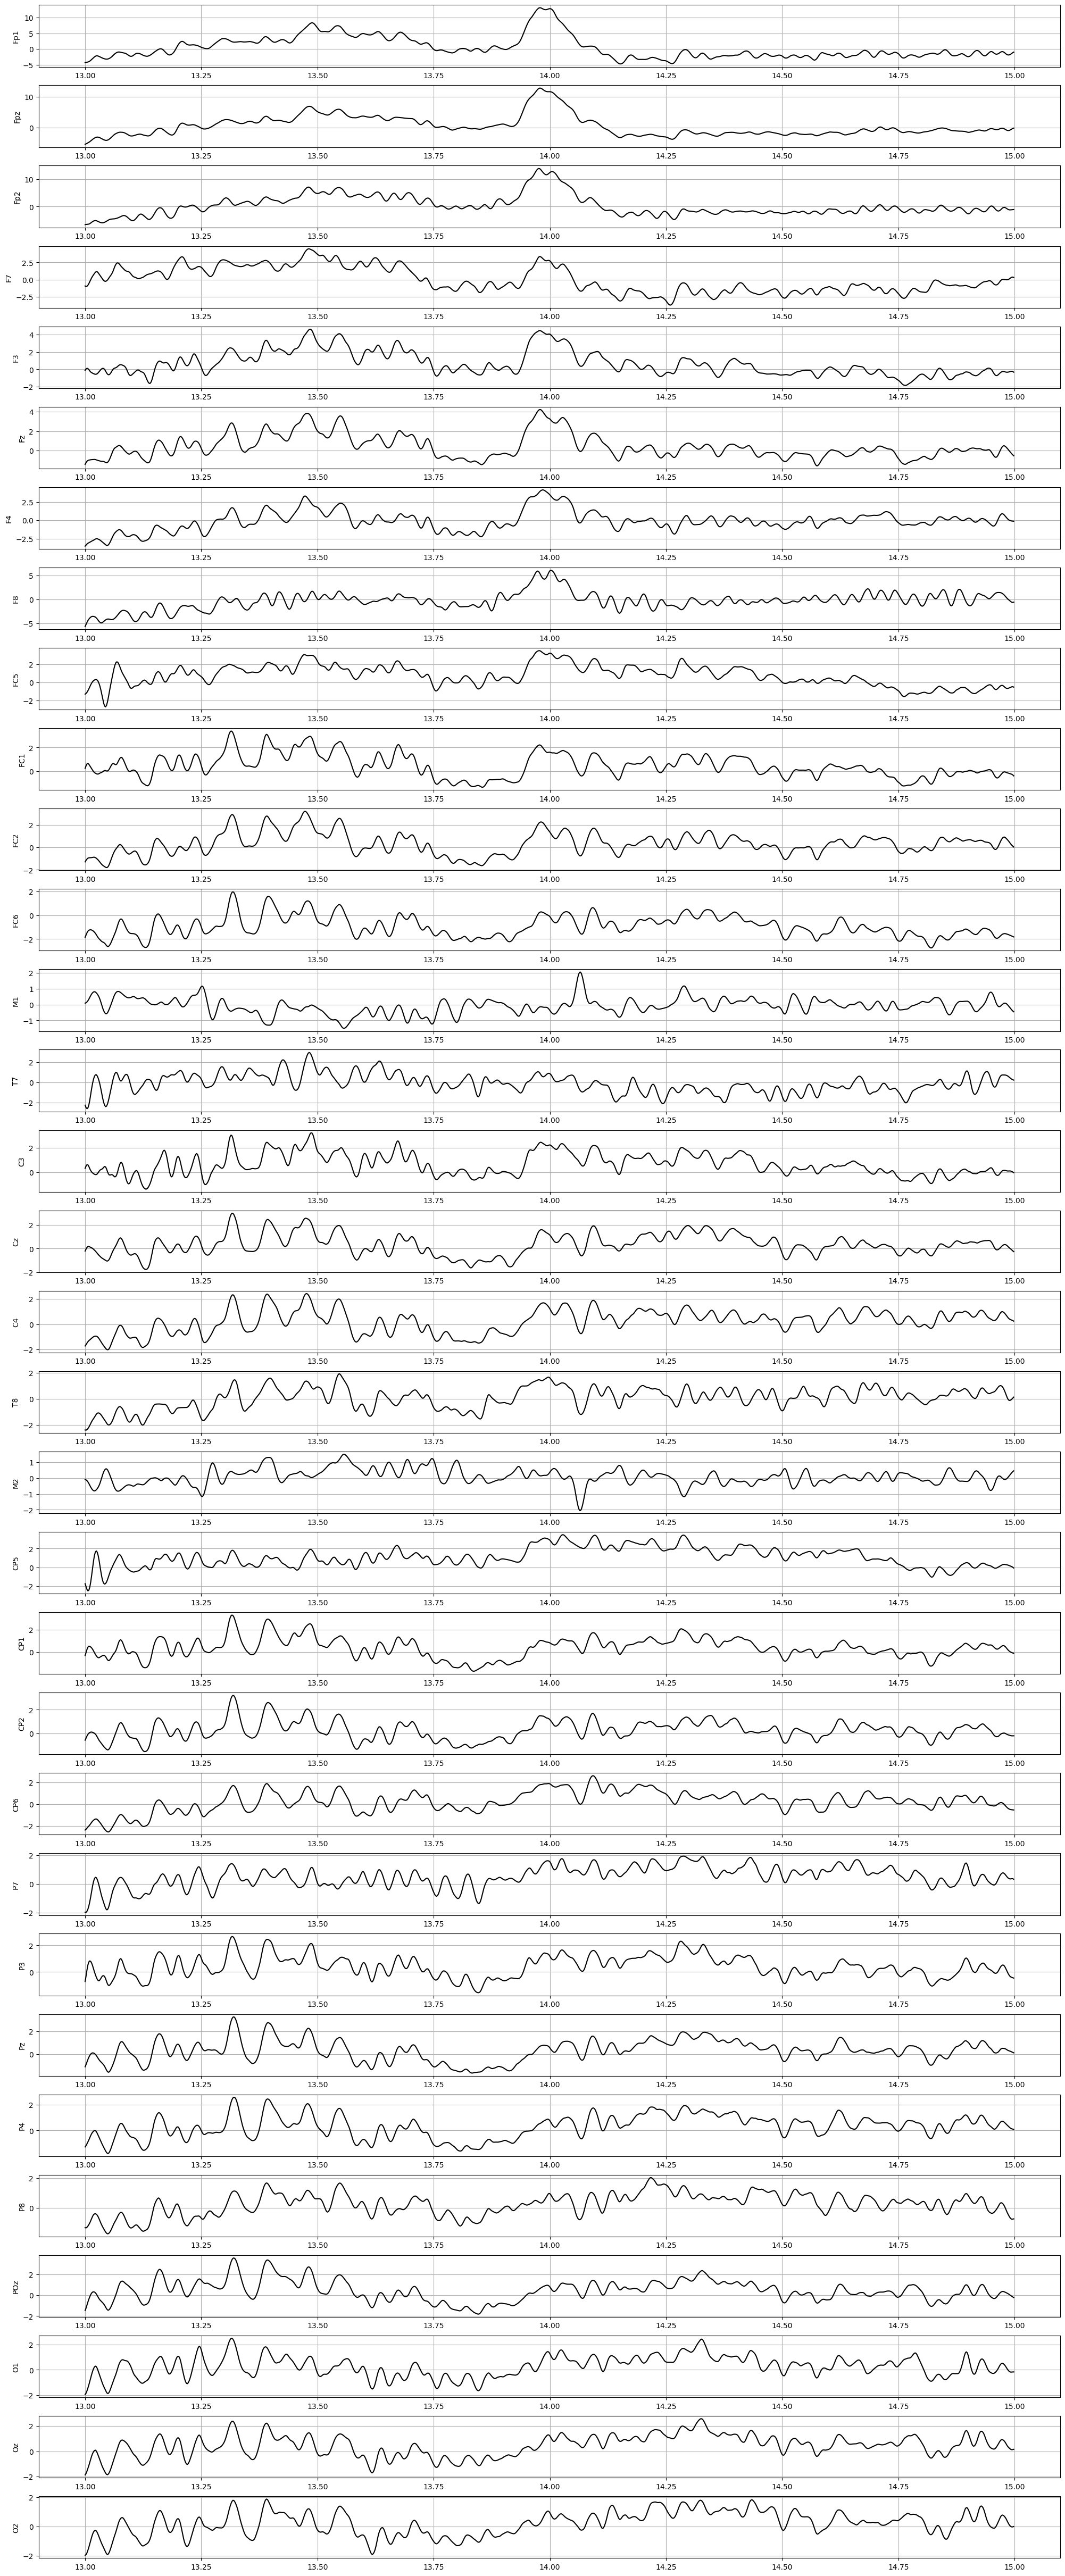

In [1]:
# 引入python库
# %matplotlib notebook
import mne
import os
import matplotlib.pyplot as plt

# 指定CNT文件路径
cnt_file = 'D:\\TVB_Distribution\\test\\DATA\\A_MI.cnt'

# 使用mne加载CNT文件
raw = mne.io.read_raw_cnt(cnt_file, preload=True)

# new_sfreq = 1024  # 新的采样率（以毫秒为单位）
# raw.resample(new_sfreq)

# 访问加载的数据
print(raw.info)

# 获取时间范围
start_time = raw.times[0]
end_time = raw.times[-1]

# 设定时间和通道
time_start = 13.
time_end = 15.
picks = mne.pick_types(raw.info, eeg=True, exclude='bads')
t_idx = raw.time_as_index([time_start, time_end])

# 0.1Hz~100Hz高低通滤波，以及50Hz陷波滤波
raw_hlfilter = raw.copy().filter(l_freq=0.1, h_freq=100,method='fir')
raw_hltfilter = raw_hlfilter.copy().notch_filter(freqs=50)

# 选取M1和M2为参考通道
raw_ref = raw_hltfilter.copy().set_eeg_reference(ref_channels = ['M1', 'M2'])

# 打印时间范围
# print("数据的时间范围：{} 秒 到 {} 秒".format(start_time, end_time))

# 修改时间和通道
data, times = raw_ref[picks, t_idx[0]:t_idx[1]]
data1, times1 = raw[picks, t_idx[0]:t_idx[1]]

# for i in range(0, 32, 1):
#     for j in range(0, len(data[i]), 1):
#         print(data[i][j], data1[i][j])

for i in range(0, 32, 1):
    plt.subplot(32, 1, i + 1)

    plt.plot(times, data.T[:,i:i+1]*1e5, 'k', alpha=1)
    plt.ylabel(raw_ref.info.ch_names[i])
#     ax = plt.gca()
#     ax.set_ylim([-0.1, 0.1])
    plt.grid(True)

plt.subplots_adjust(left=0,
                    bottom=0,
                    right=3,
                    top=10,
                    wspace=0,
                    hspace=0.3
                   )

plt.show()

In [14]:
events_from_annot, event_dict = mne.events_from_annotations(raw_ref)
print(event_dict)
print(events_from_annot[:20])

Used Annotations descriptions: ['0', '1', '2', '3', '4']
{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5}
[[    1     0     1]
 [20981     0     2]
 [21981     0     3]
 [22989     0     5]
 [24997     0     2]
 [25997     0     3]
 [26997     0     4]
 [29006     0     2]
 [30006     0     3]
 [31006     0     5]
 [33014     0     2]
 [34014     0     3]
 [35014     0     4]
 [37022     0     2]
 [38022     0     3]
 [39022     0     4]
 [41031     0     2]
 [42031     0     3]
 [43031     0     4]
 [45039     0     2]]


Used Annotations descriptions: ['1']
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 501 original time points ...
0 bad epochs dropped


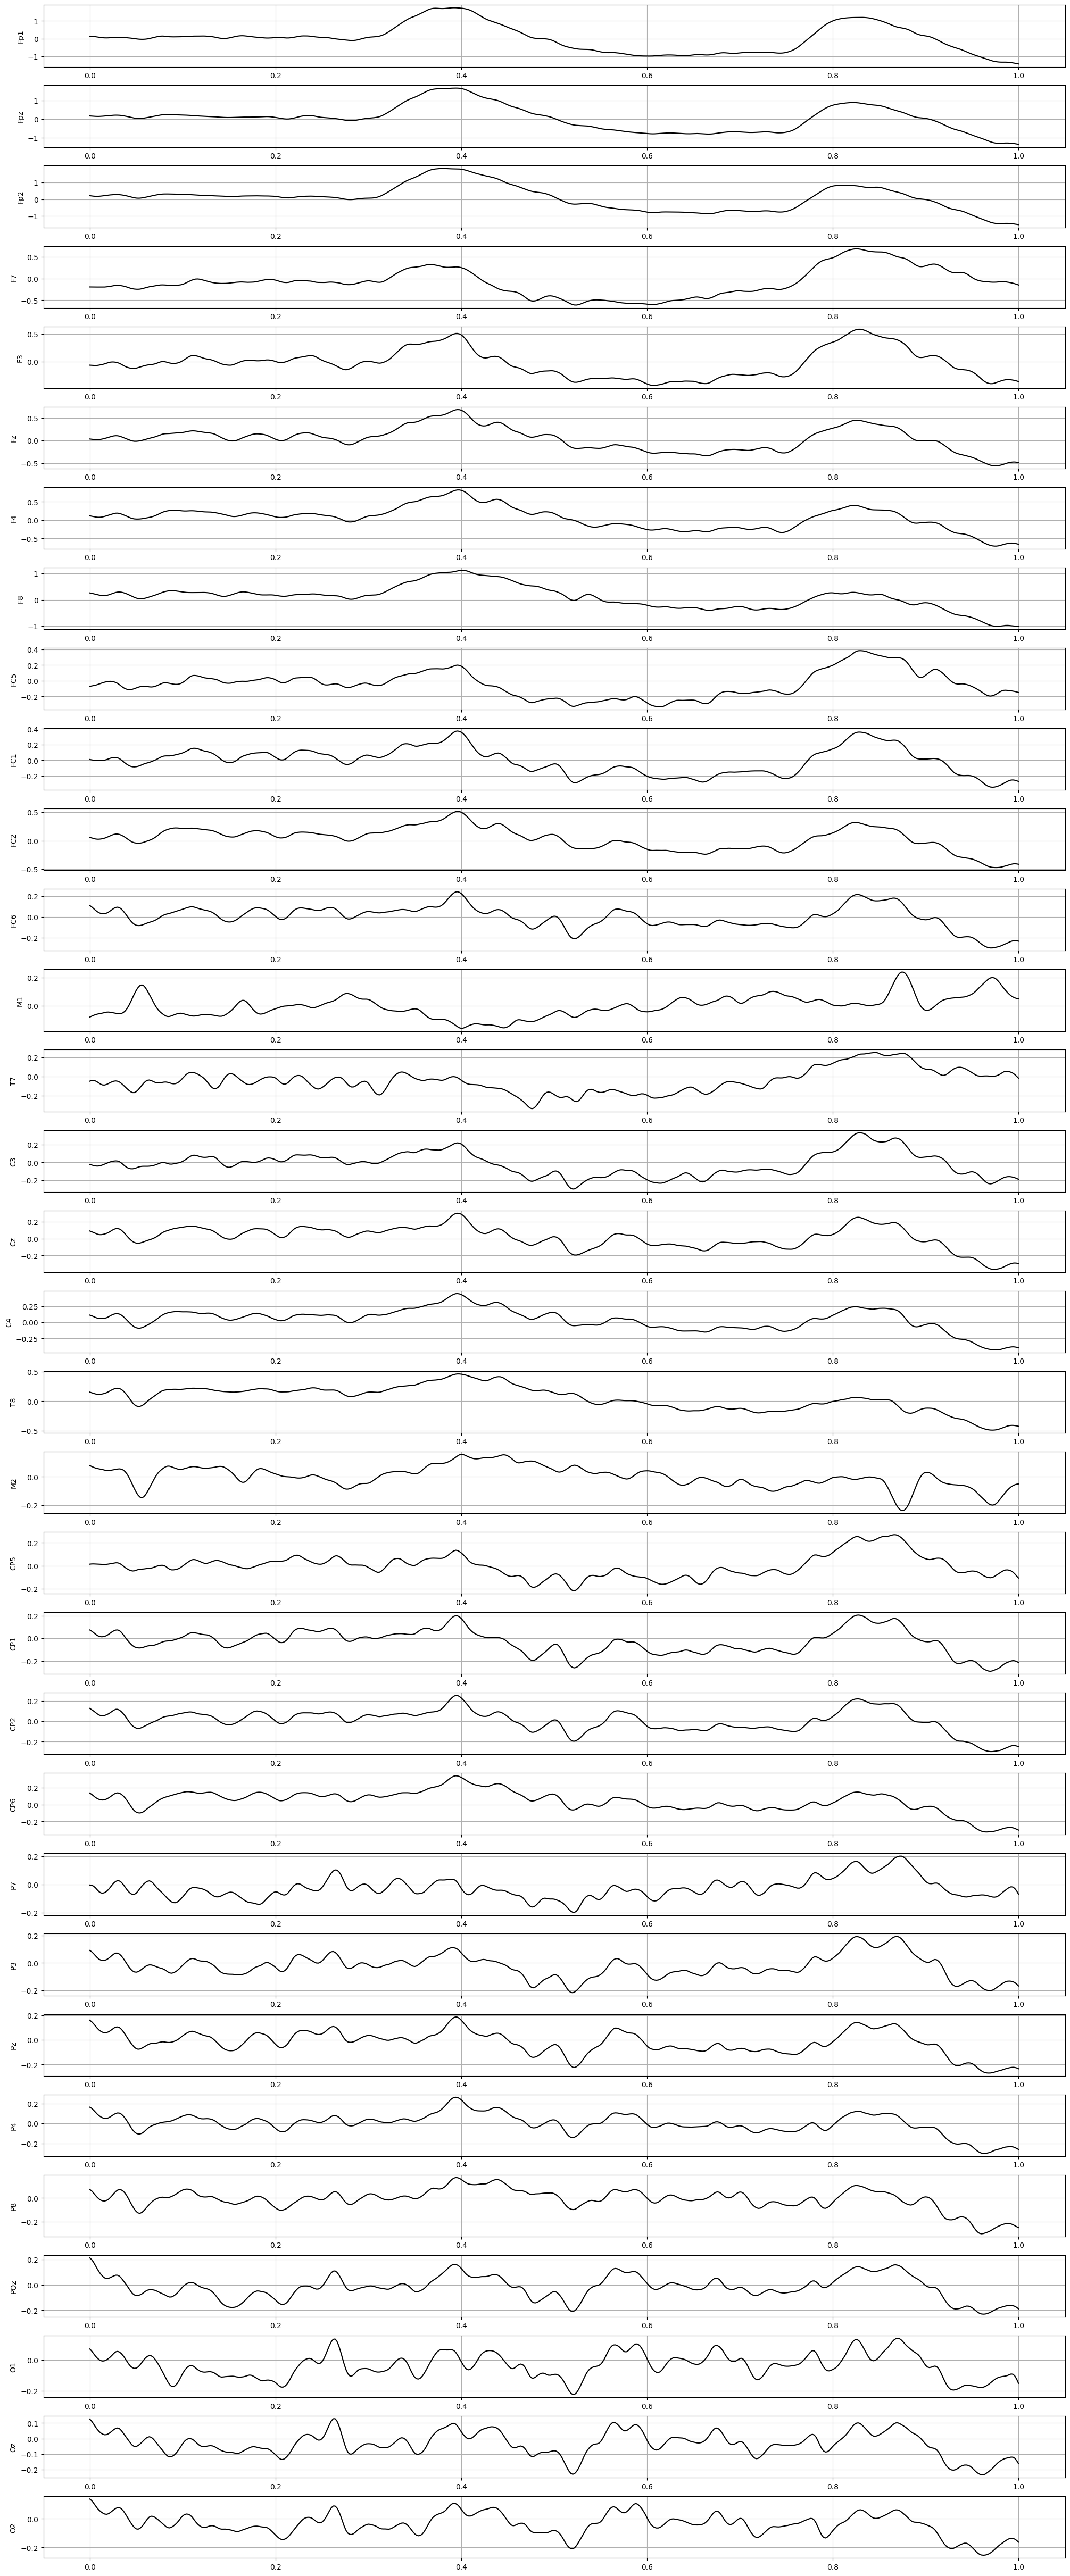

In [18]:
# 取出对应标签的事件信息，“1”是描述， 2是标签
custom_mapping = {"1": 2}
events_from_annot, event_dict = mne.events_from_annotations(raw_ref, event_id=custom_mapping)
# print(event_dict)
# print(events_from_annot[:])

# 创建Epochs对象用于根据事件获得数据，tmin指事件发生前几秒，tmax指事件发生后几秒
event_data = mne.Epochs(raw_ref, events_from_annot, tmin=0.0, tmax=1.0, baseline=None, preload=True)

# 分别获得电位差数据以及时间数据
data_rest = event_data.get_data()
times_rest = event_data.times

# print(len(data_rest[0][0]))
# print((times_rest))
# print(event_data)

# 取出第5个事件的电位差数据
data_seg = data_rest[5]

for i in range(0, 32, 1):
    plt.subplot(32, 1, i + 1)
    # unit is μV
    plt.plot(times_rest, data_seg.T[:,i:i+1]*1e4, 'k', alpha=1)
    plt.ylabel(raw_ref.info.ch_names[i])
    # ax = plt.gca()
    # ax.set_ylim([-0.1, 0.1])
    plt.grid(True)    

plt.subplots_adjust(left=0,
                    bottom=0,
                    right=3,
                    top=10,
                    wspace=0,
                    hspace=0.3
                   )

plt.show()
